In [1]:
import utils, umls_tables_processing
import plotly.graph_objects as go
from plotly.subplots import make_subplots

0:00:10


In [2]:
big_g = utils.inputs_load('Utilities/RelatednessData/relatedness_data__onlypreflab2021-10-08 16:12:17.177422')

0:00:00


In [3]:
embs = list(big_g.keys())
ks = list(big_g[embs[0]].keys())
seeds = list(big_g[embs[0]][ks[0]].keys())
seed = seeds[2] # seed_union


In [4]:
seeds

['seed_rel', 'seed_paper', 'seed_union']

In [5]:
for k in ks:
    sorted_dict = {h:v[k][seed][0] for h,v in big_g.items()}
    sorted_dict_ = {h: v for h, v in sorted(sorted_dict.items(), key=lambda item: item[1])}
    embs = list(sorted_dict_.keys())
    print(str(k)+'\n')
    print(embs)

5

['stanford_cuis_svd_300.txt', 'claims_cuis_hs_300.txt', 'Health_2.5mreviews.s200.w10.n5.v15.cbow', 'tweetsvec', 'GoogleNews-vectors-negative300', 'DeVine_etal_200', 'cui2vec_pretrained', 'wikipedia-pubmed-and-PMC-w2v', 'PMC-w2v', 'PubMed-and-PMC-w2v', 'PubMed-w2v']
10

['stanford_cuis_svd_300.txt', 'claims_cuis_hs_300.txt', 'Health_2.5mreviews.s200.w10.n5.v15.cbow', 'tweetsvec', 'GoogleNews-vectors-negative300', 'DeVine_etal_200', 'wikipedia-pubmed-and-PMC-w2v', 'cui2vec_pretrained', 'PMC-w2v', 'PubMed-and-PMC-w2v', 'PubMed-w2v']
20

['stanford_cuis_svd_300.txt', 'claims_cuis_hs_300.txt', 'Health_2.5mreviews.s200.w10.n5.v15.cbow', 'tweetsvec', 'GoogleNews-vectors-negative300', 'DeVine_etal_200', 'wikipedia-pubmed-and-PMC-w2v', 'PubMed-and-PMC-w2v', 'cui2vec_pretrained', 'PubMed-w2v', 'PMC-w2v']
30

['stanford_cuis_svd_300.txt', 'claims_cuis_hs_300.txt', 'Health_2.5mreviews.s200.w10.n5.v15.cbow', 'tweetsvec', 'GoogleNews-vectors-negative300', 'wikipedia-pubmed-and-PMC-w2v', 'DeVine_e

In [6]:
k = 10
sorted_dict = {h:v[k][seed][0] for h,v in big_g.items()}
sorted_dict_ = {h: v for h, v in sorted(sorted_dict.items(), key=lambda item: item[1])}
del sorted_dict_['stanford_cuis_svd_300.txt']
embs = list(sorted_dict_.keys())

In [7]:
embs_ = {}
for emb in embs:
    a = emb.replace('-w2v', '')
    b = a.split('_', 1)
    if 'wikipedia' in b[0]:
        b[0] = 'wiki-PubMed-PMC'
    elif 'Google' in b[0]:
        b[0] = 'GoogleNews'
    embs_[emb] = b[0]

# https://developer.mozilla.org/en-US/docs/Web/CSS/color_value
colors = ['lightgreen', 'lightcoral', 'darkslateblue',   'purple']
parallel_colors = ['seagreen', 'darksalmon', 'royalblue', 'mediumpurple']
colors_k = ['darkslateblue', 'aqua', 'deepskyblue', 'aquamarine', 'cadetblue', 'cornflowerblue']

In [8]:
embs

['claims_cuis_hs_300.txt',
 'Health_2.5mreviews.s200.w10.n5.v15.cbow',
 'tweetsvec',
 'GoogleNews-vectors-negative300',
 'DeVine_etal_200',
 'wikipedia-pubmed-and-PMC-w2v',
 'cui2vec_pretrained',
 'PMC-w2v',
 'PubMed-and-PMC-w2v',
 'PubMed-w2v']

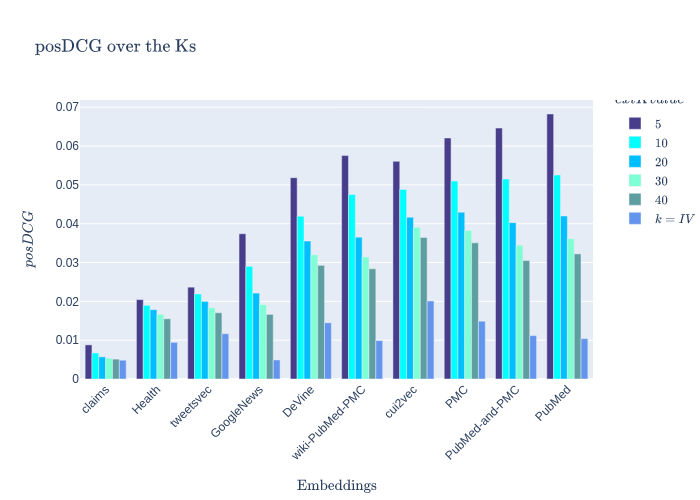

In [9]:
seed = seeds[2]# seed_union
fig = go.Figure()

em = list(embs_.values())
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb][5][seed][0] for emb in embs],
    name=r'$5$',
    marker_color='darkslateblue'
))
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb][10][seed][0] for emb in embs],
    name=r'$10$',
    marker_color= 'aqua'
))
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb][20][seed][0] for emb in embs],
    name=r'$20$',
    marker_color= 'deepskyblue'
))
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb][30][seed][0] for emb in embs],
    name=r'$30$',
    marker_color= 'aquamarine'
))
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb][40][seed][0] for emb in embs],
    name=r'$40$',
    marker_color= 'cadetblue'
))
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb]['max_k'][seed][0] for emb in embs],
    name=r'$k=IV$',
    marker_color= 'cornflowerblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=r'$\text{posDCG over the Ks}$',
                  xaxis_title=r'$\text{Embeddings}$',
                  yaxis_title=r'$posDCG$', 
                  barmode='group',
                  legend_title = '$\text{K value}$',
                  xaxis_tickangle=-45)
#fig.write_image("fig1.png")
fig.show(renderer="png")

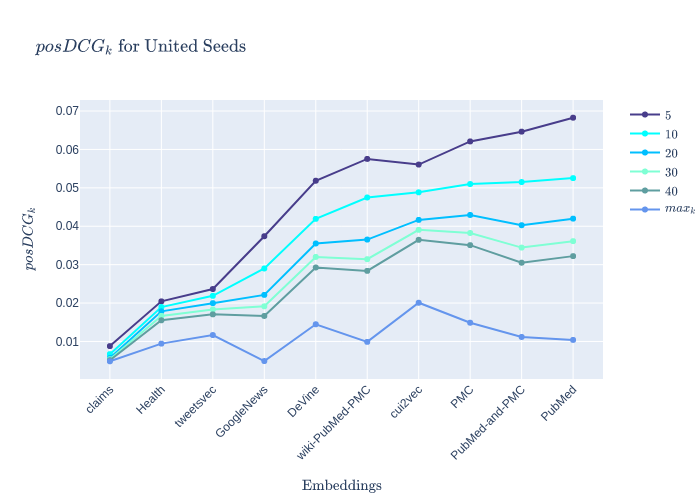

In [30]:
fig = go.Figure()

for i, t in enumerate(ks):
    fig.add_trace(go.Scatter(
        x=em,
        y=[big_g[emb][t][seed][0] for emb in embs],
        name=r'$'+str(t)+'$',
        marker_color=colors_k[i]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=r'$posDCG_{k} \text{ for United Seeds}$' ,
                  xaxis_title=r'$\text{Embeddings}$',
                  yaxis_title=r'$posDCG_{k}$', 
                  barmode='group',
                  #legend_title = 'K value',
                  xaxis_tickangle=-45)
fig.show(renderer="png")

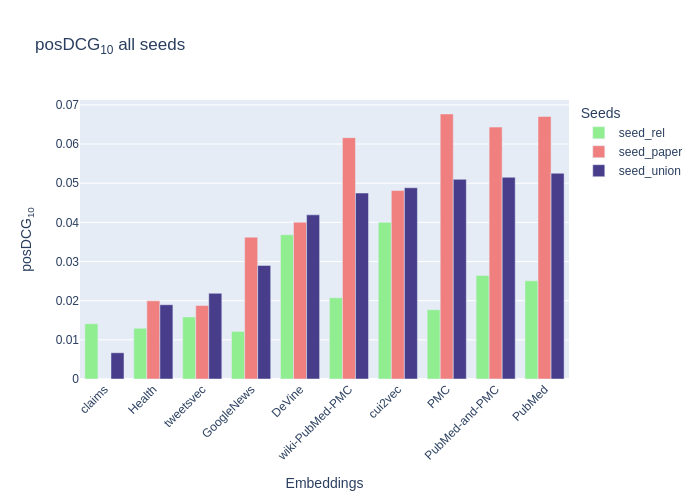

In [14]:
fig = go.Figure()

for i, seed in enumerate(seeds):
    fig.add_trace(go.Bar(
        x=em,
        y=[big_g[emb][k][seed][0] for emb in embs],
        name= seed,
        marker_color=colors[i]
        ))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='posDCG<sub>'+str(k)+'</sub> all seeds',
                  xaxis_title='Embeddings',
                  yaxis_title='posDCG<sub>'+str(k)+'</sub>',
                  legend_title = 'Seeds',
                  xaxis_tickangle=-45)
fig.show(renderer="png")

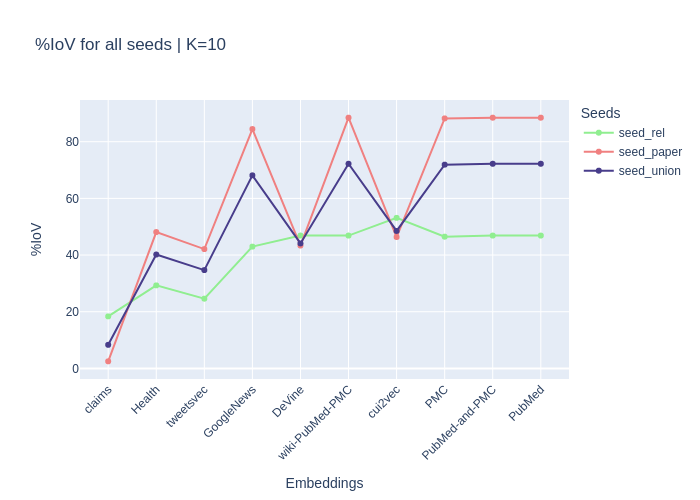

In [15]:
fig = go.Figure()

for i, seed in enumerate(seeds):
    fig.add_trace(go.Scatter(
        x=em,
        y=[(big_g[emb][k][seed][3]/big_g[emb][5][seed][5])*100 for emb in embs],
        name=seed,
        marker_color=colors[i]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='%IoV for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='%IoV',
                  legend_title = 'Seeds',
                  xaxis_tickangle=-45)
fig.show(renderer="png")


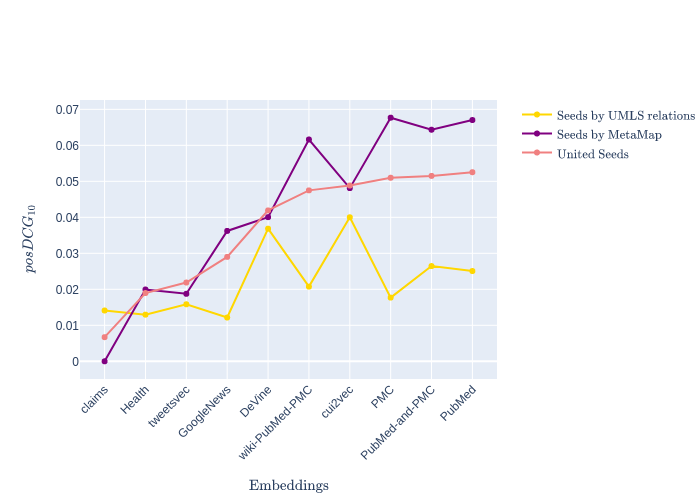

In [16]:
fig = go.Figure()

#colors_dcgs_perseed = ['lightgreen', 'aquamarine','seagreen']
colors_dcgs_perseed = ['gold', 'purple', 'lightcoral', 'black']
for i, seed in enumerate(seeds):
    if seed == 'seed_rel':
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k][seed][0] for emb in embs],
            name=r'$\text{Seeds by UMLS relations}$',
            marker_color=colors_dcgs_perseed[i]))
    elif seed == 'seed_paper':
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k][seed][0] for emb in embs],
            name=r'$\text{Seeds by MetaMap}$',
            marker_color=colors_dcgs_perseed[i]))
    elif seed == 'seed_union':
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k][seed][0] for emb in embs],
            name=r'$\text{United Seeds}$',
            marker_color=colors_dcgs_perseed[i]))        


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(#title=r'$posDCG_{10} \text{ for all seeds}$',
                  xaxis_title=r'$\text{Embeddings}$',
                  yaxis_title=r'$posDCG_{10}$',
                  #legend_title = r'$\text{Seeds}$',
                  xaxis_tickangle=-45)
fig.show(renderer="png")


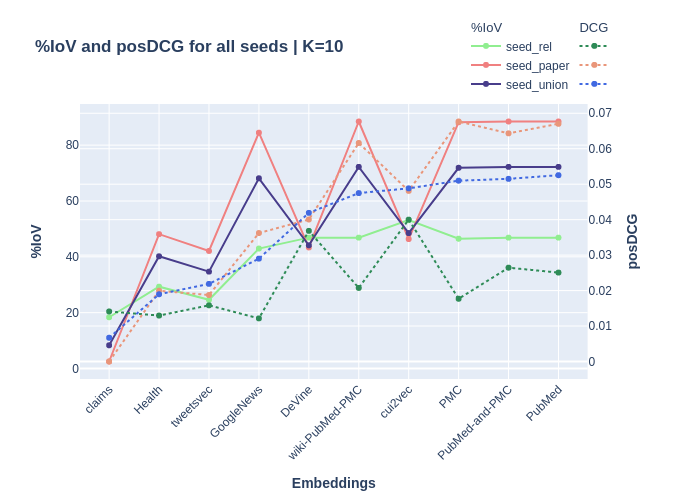

In [17]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[(big_g[emb][k][seed][3]/big_g[emb][5][seed][5])*100 for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text="%IoV"
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[(big_g[emb][k][seed][3]/big_g[emb][5][seed][5])*100 for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            legendgrouptitle_text="DCG",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)        

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='<b>%IoV and posDCG for all seeds | K=' + str(k)+'</b>',
                  xaxis_title='<b>Embeddings</b>',
                  yaxis_title='<b>%IoV</b>',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="<b>%IoV</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>posDCG</b>", secondary_y=True)
fig.show(renderer="png")



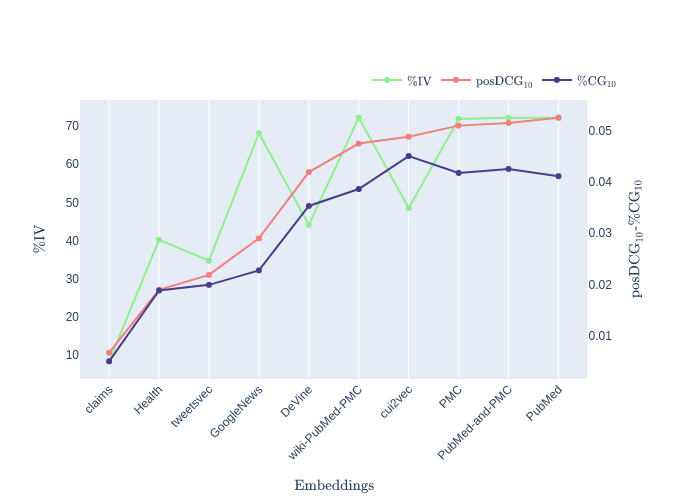

In [18]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
    
fig.add_trace(go.Scatter(
    x=em,
    y=[(big_g[emb][k]['seed_union'][3]/big_g[emb][k]['seed_union'][5])*100 for emb in embs],
    name=r'$\text{%IV}$',
    marker_color=colors[0],
    legendgroup="group"#,legendgrouptitle_text=r'$\text{\%IV}$'
), secondary_y=False)

    
fig.add_trace(go.Scatter(
    x=em,
    y=[big_g[emb][k]['seed_union'][0] for emb in embs],
    name=r'$\text{posDCG}_{10}$',
    legendgroup="group2",#legendgrouptitle_text=r'$\text{posDCG}_{10}$',
    line = dict(color=colors[1])),
              secondary_y=True)

fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k]['seed_union'][2] for emb in embs],
            name=r'$\text{%CG}_{10}$',
            marker_color=colors[2],
            legendgroup="group3"#, legendgrouptitle_text=
        ), secondary_y=True)


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(#title='<b>%IV, posDCG & %CG</b>',
                  xaxis_title=r'$\text{Embeddings}$',
                  yaxis_title=r'$\%IV$',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.update_yaxes(title_text=r'$\text{%IV}$', showgrid=False, secondary_y=False)
fig.update_yaxes(title_text=r'$\text{posDCG}_{10}\text{-%CG}_{10}$', showgrid=False, secondary_y=True)
#fig.update_xaxes(showgrid=False)
fig.show(renderer="png")

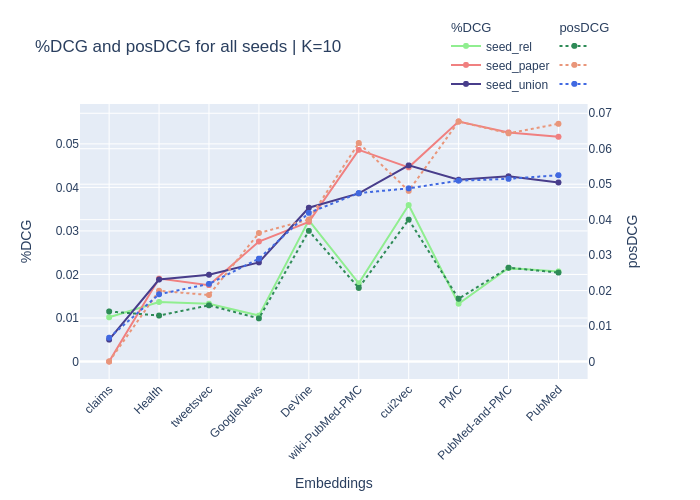

In [83]:

fig = make_subplots(specs=[[{"secondary_y": True}]])
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k][seed][2] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text="%DCG"
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k][seed][2] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            legendgrouptitle_text="posDCG",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)        

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='%DCG and posDCG for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='%DCG',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="%DCG", secondary_y=False)
fig.update_yaxes(title_text="posDCG", secondary_y=True)
fig.show(renderer="png")



In [20]:
vemb_card = utils.inputs_load('Utilities/cardinality_vembs')

0:00:00


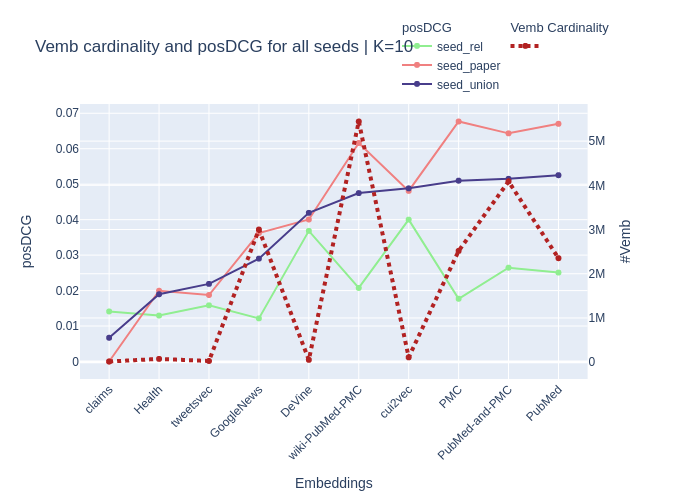

In [85]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k][seed][0] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text="posDCG"
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][k][seed][0] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        
    
fig.add_trace(go.Scatter(
    x=em,
    y=[vemb_card[emb] for emb in embs],
    name='',
    legendgroup="group2",
    legendgrouptitle_text="Vemb Cardinality",
    line = dict(color='firebrick', width = 4, dash='dot')),
              secondary_y=True)

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='Vemb cardinality and posDCG for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  #yaxis_title='%DCG',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="posDCG", secondary_y=False)
fig.update_yaxes(title_text="#Vemb", secondary_y=True)
fig.show(renderer="png")



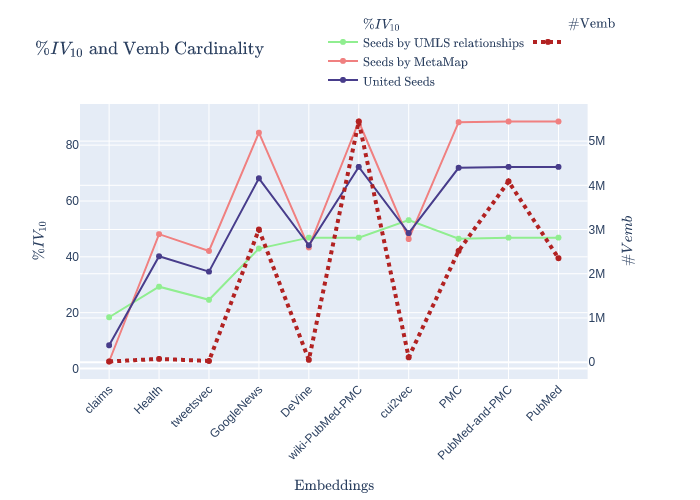

In [48]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
    
for i, seed in enumerate(seeds):
    if seed == 'seed_paper':
        nam = r'$\text{Seeds by MetaMap}$'
    if seed == 'seed_rel':
        nam = r'$\text{Seeds by UMLS relationships}$'
    if seed == 'seed_union':
        nam = r'$\text{United Seeds}$'
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[(big_g[emb][k][seed][3]/big_g[emb][k][seed][5])*100 for emb in embs],
            name=nam,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text=r'$\%IV_{'+str(k)+'}$'
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[(big_g[emb][k][seed][3]/big_g[emb][k][seed][5])*100 for emb in embs],
            name=nam,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        

fig.add_trace(go.Scatter(
    x=em,
    y=[vemb_card[emb] for emb in embs],
    name='',
    legendgroup="group2",
    legendgrouptitle_text=r'$\text{#Vemb}$',
    line = dict(color='firebrick', width = 4, dash='dot')),
              secondary_y=True)     

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=r'$\%IV_{10} \text{ and Vemb Cardinality }$',
                  xaxis_title=r'$\text{Embeddings}$',
                  #yaxis_title='%IoV',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text=r'$\%IV_{'+str(k)+'}$', secondary_y=False)
fig.update_yaxes(title_text=r'$\#Vemb$', secondary_y=True)
fig.show(renderer="png")



In [10]:
colors_analog = ['gainsboro', 'purple', 'forestgreen', 'yellow', 'orange', 
                 'aqua', 'plum', 'tomato', 'lightslategray', 'orangered',
                 'yellowgreen', 'aliceblue', 'mediumvioletred', 'gold', 'sandybrown',
                 'aquamarine', 'black','lime', 'pink', 'limegreen', 'royalblue', 'blue']

In [11]:
# Brief strings for x axis
'''
embs = list(big_g.keys())
embs_ = {}
for emb in embs:
    a = emb.replace('-w2v', '')
    b = a.split('_', 1)
    if 'wikipedia' in b[0]:
        b[0] = 'wiki-PubMed-PMC'
    elif 'Google' in b[0]:
        b[0] = 'GoogleNews'
    embs_[emb] = b[0]
em = list(embs_.values())
'''

In [36]:
tmp = utils.inputs_load('Utilities/AnalogicalData/ANALOG_VARIABLE')
relas = list(tmp[embs[0]]['add'].keys())

0:00:00


In [37]:
opposite_relas = umls_tables_processing.OPPOSITE_RELAS

In [38]:
flattened_opposite = [i for o in opposite_relas for i in o]

In [39]:
relas_colors = {rela: color for rela, color in zip(relas, colors_analog)}

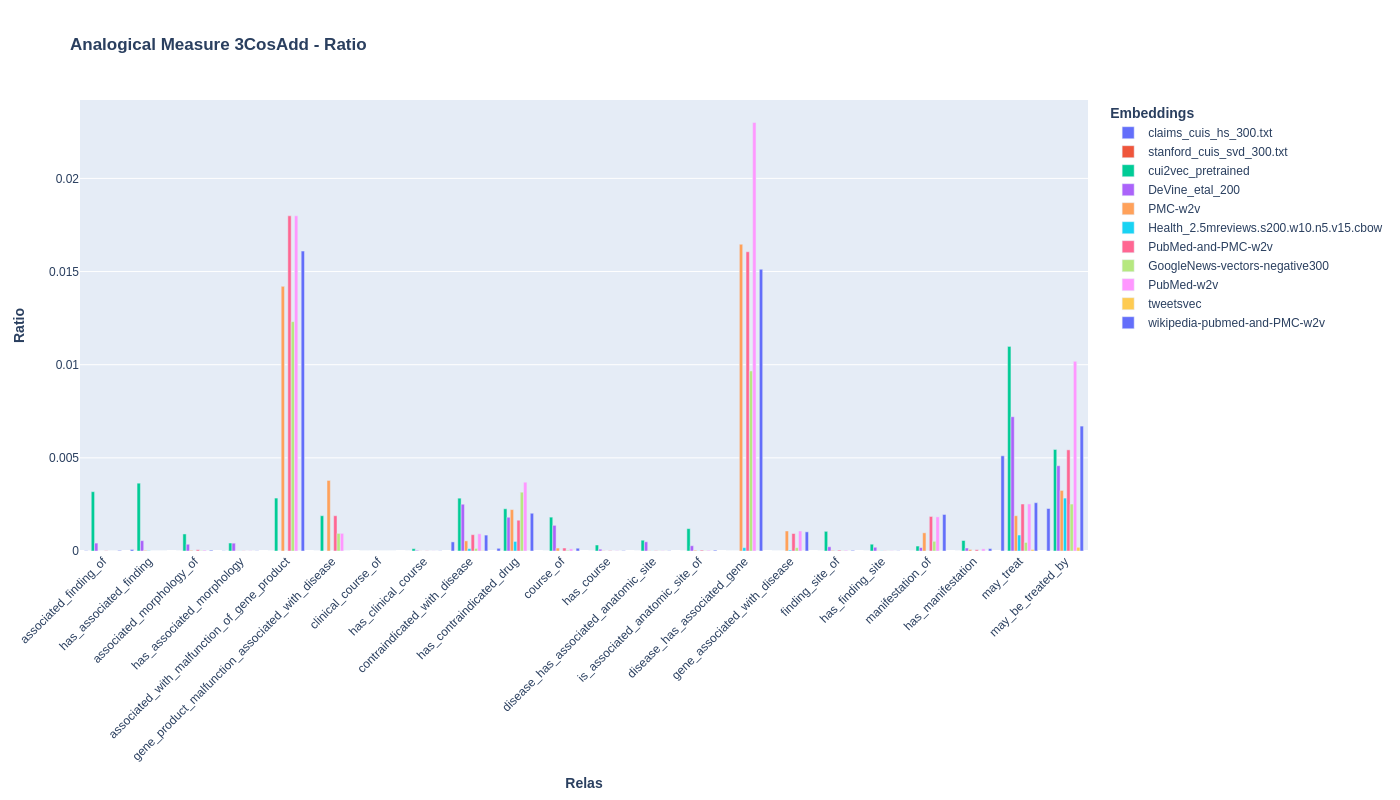

In [22]:
seed = seeds[2]# seed_union
fig = go.Figure()

for i,e in enumerate(embs):
    fig.add_trace(go.Bar(name=e, x=flattened_opposite, y=[tmp[e]['add'][r]['ratio'] for r in flattened_opposite]#,
                                    #marker_color=q[i],
)) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='<b>Analogical Measure 3CosAdd - Ratio</b>'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = '<b>Embeddings</b>',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="<b>Ratio</b>"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="<b>Relas</b>"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

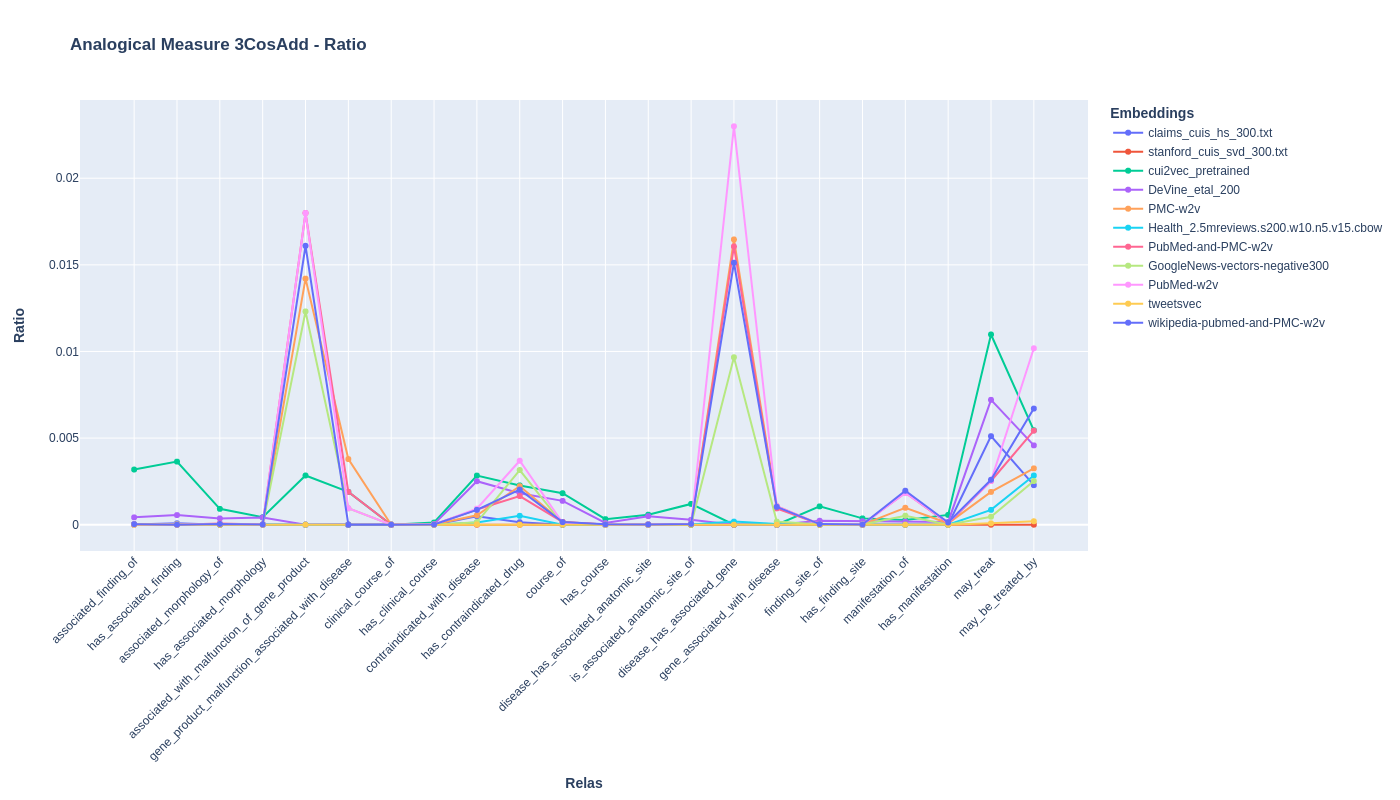

In [23]:
seed = seeds[2]# seed_union
fig = go.Figure()

for i, e in enumerate(embs):
    fig.add_trace(go.Scatter(name=e, x=flattened_opposite, y=[tmp[e]['add'][r]['ratio'] for r in flattened_opposite], 
                             #marker_color=q[i],
                             mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='<b>Analogical Measure 3CosAdd - Ratio</b>'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = '<b>Embeddings</b>',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="<b>Ratio</b>"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="<b>Relas</b>"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

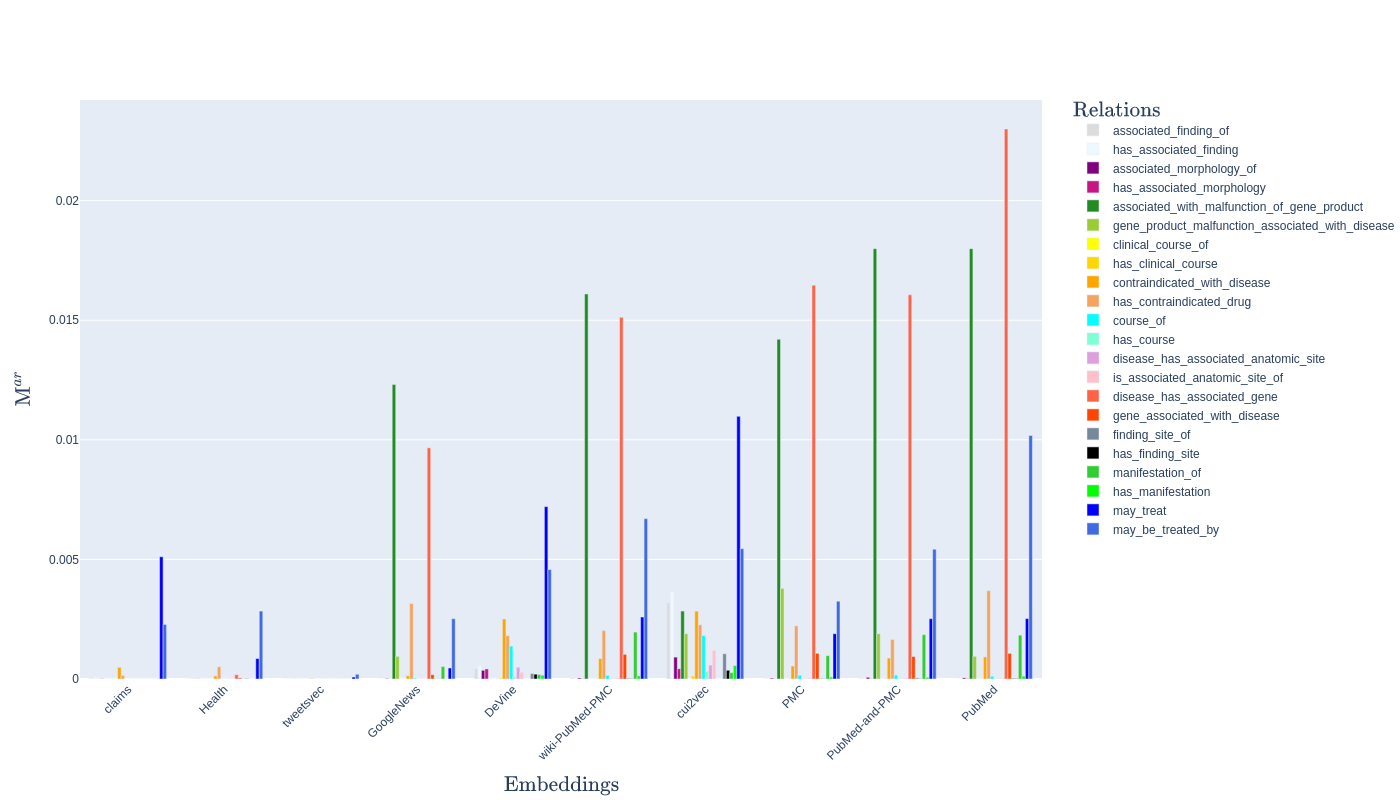

In [42]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in flattened_opposite:
    fig.add_trace(go.Bar(name=r, x=em, y=[tmp[e]['add'][r]['ratio'] for e in embs], marker=dict(color = relas_colors[r]))
)#, mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(#title=dict(text=r'$\text{M}^{ar}$'),#, 
                             #font=dict(size=50)),
                  barmode='group',
                  legend_title = r'$\Large{\text{Relations}}$',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text=r'$\Large{\text{M}^{ar}}$'#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text=r'$\Large{\text{Embeddings}}$'#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

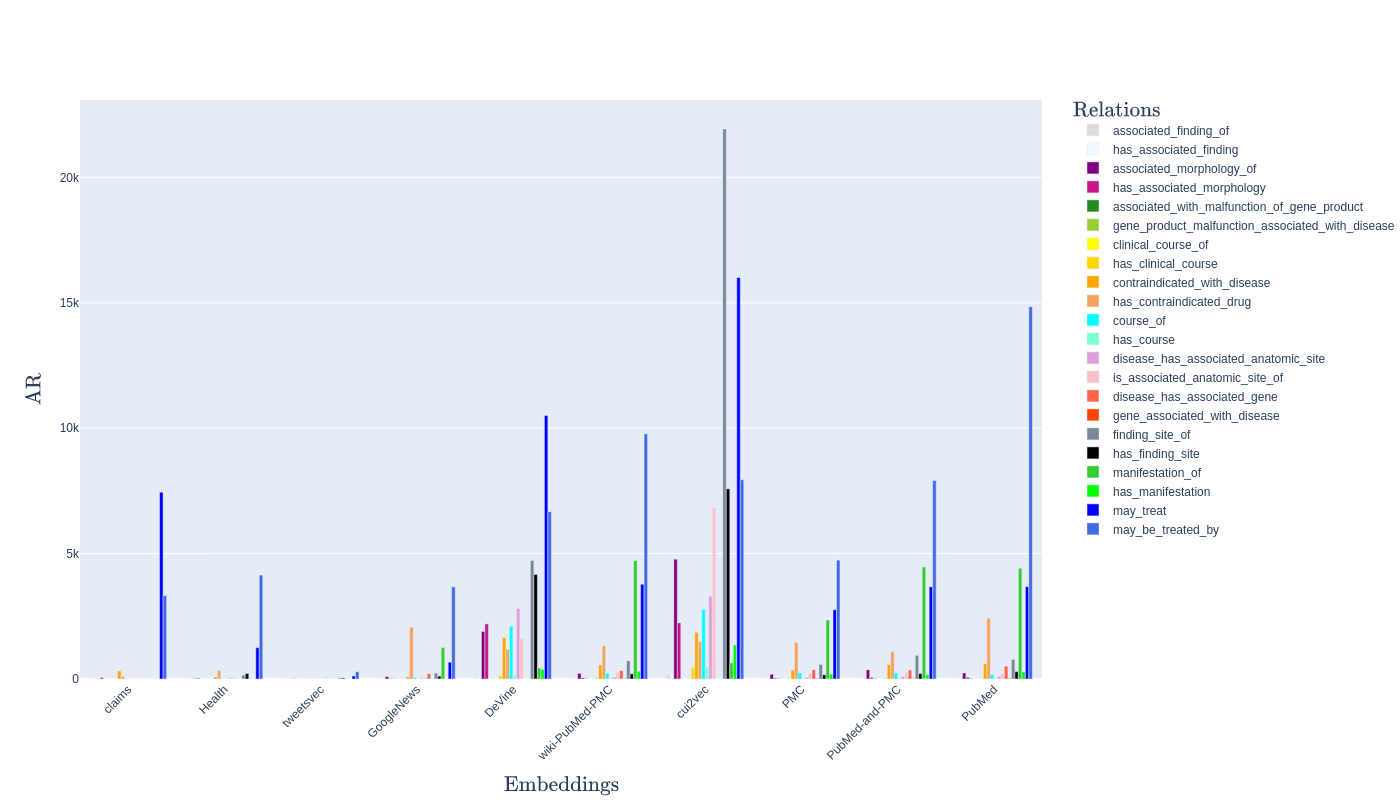

In [43]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in flattened_opposite:
    fig.add_trace(go.Bar(name=r, x=em, y=[tmp[e]['add'][r]['count'] for e in embs], marker=dict(color = relas_colors[r])))#, mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(#title=dict(text='<b>Analogical Measure 3CosAdd - Count</b>'#, 
                             #font=dict(size=50)
                  #          ),
                  barmode='group',
                  legend_title = r'$\large{\text{Relations}}$',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text=r'$\large{\text{AR}}$'#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text=r'$\large{\text{Embeddings}}$'#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

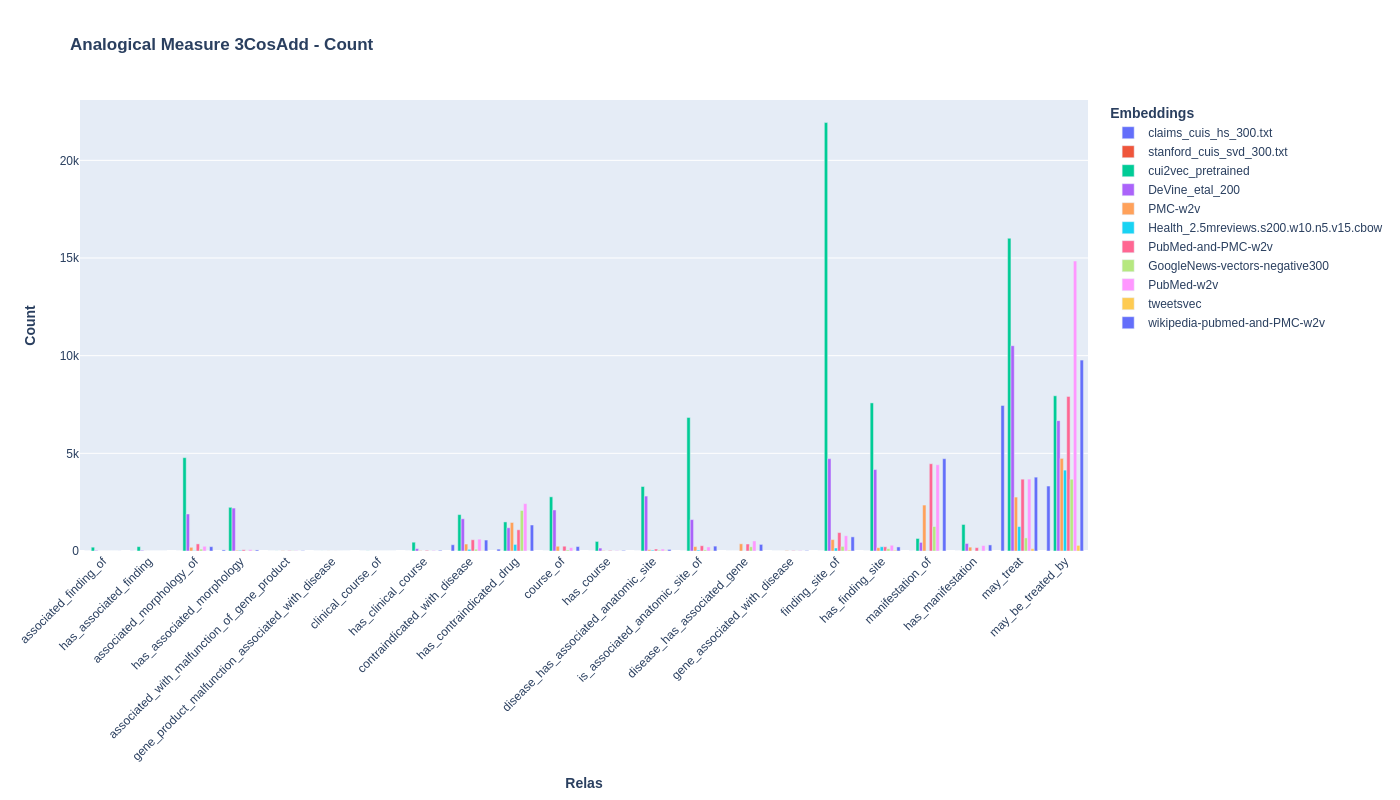

In [26]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Bar(name=e, x=flattened_opposite, y=[tmp[e]['add'][r]['count'] for r in flattened_opposite])) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='<b>Analogical Measure 3CosAdd - Count</b>'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = '<b>Embeddings</b>',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="<b>Count</b>"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="<b>Relas</b>"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

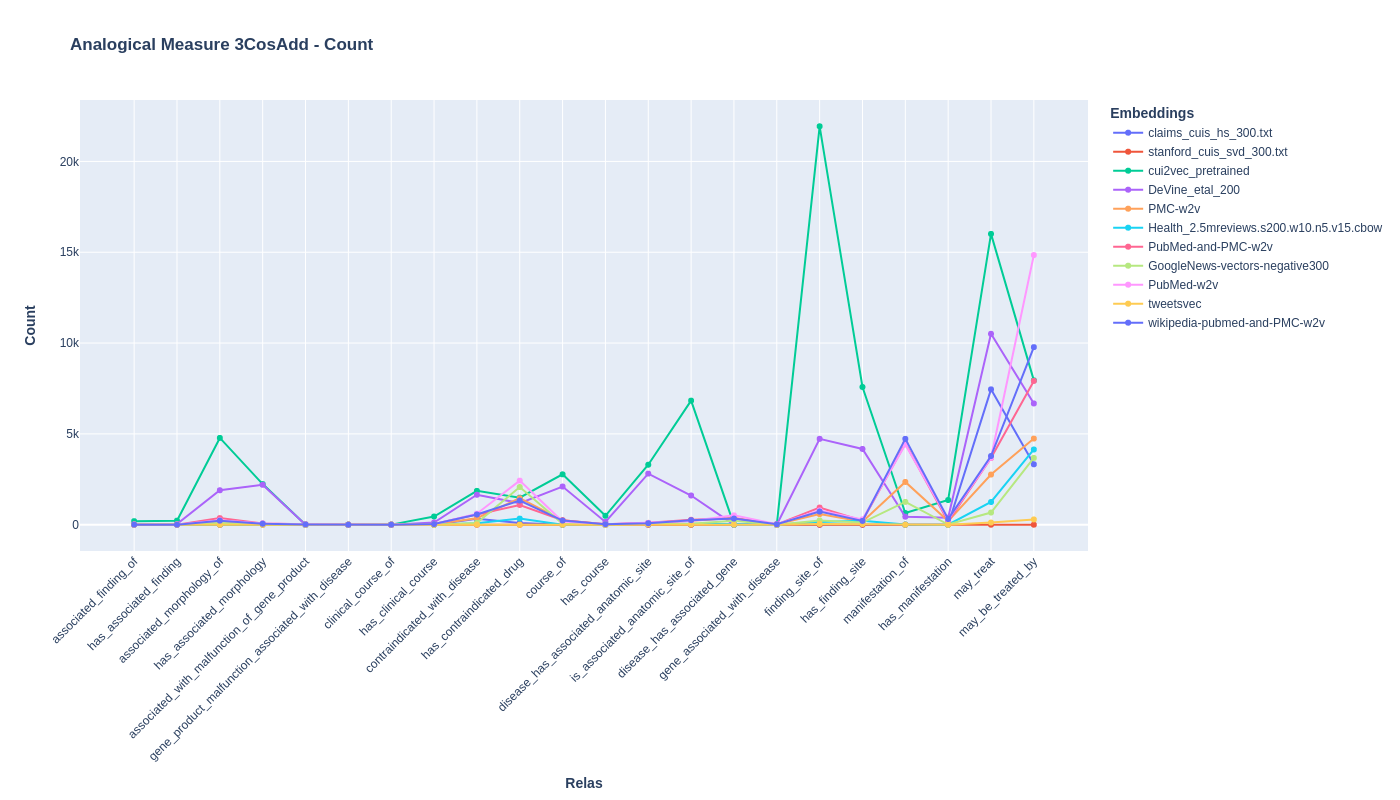

In [27]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Scatter(name=e, x=flattened_opposite, y=[tmp[e]['add'][r]['count'] for r in flattened_opposite], mode = 'lines+markers'
)) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='<b>Analogical Measure 3CosAdd - Count</b>'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = '<b>Embeddings</b>',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="<b>Count</b>"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="<b>Relas</b>"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

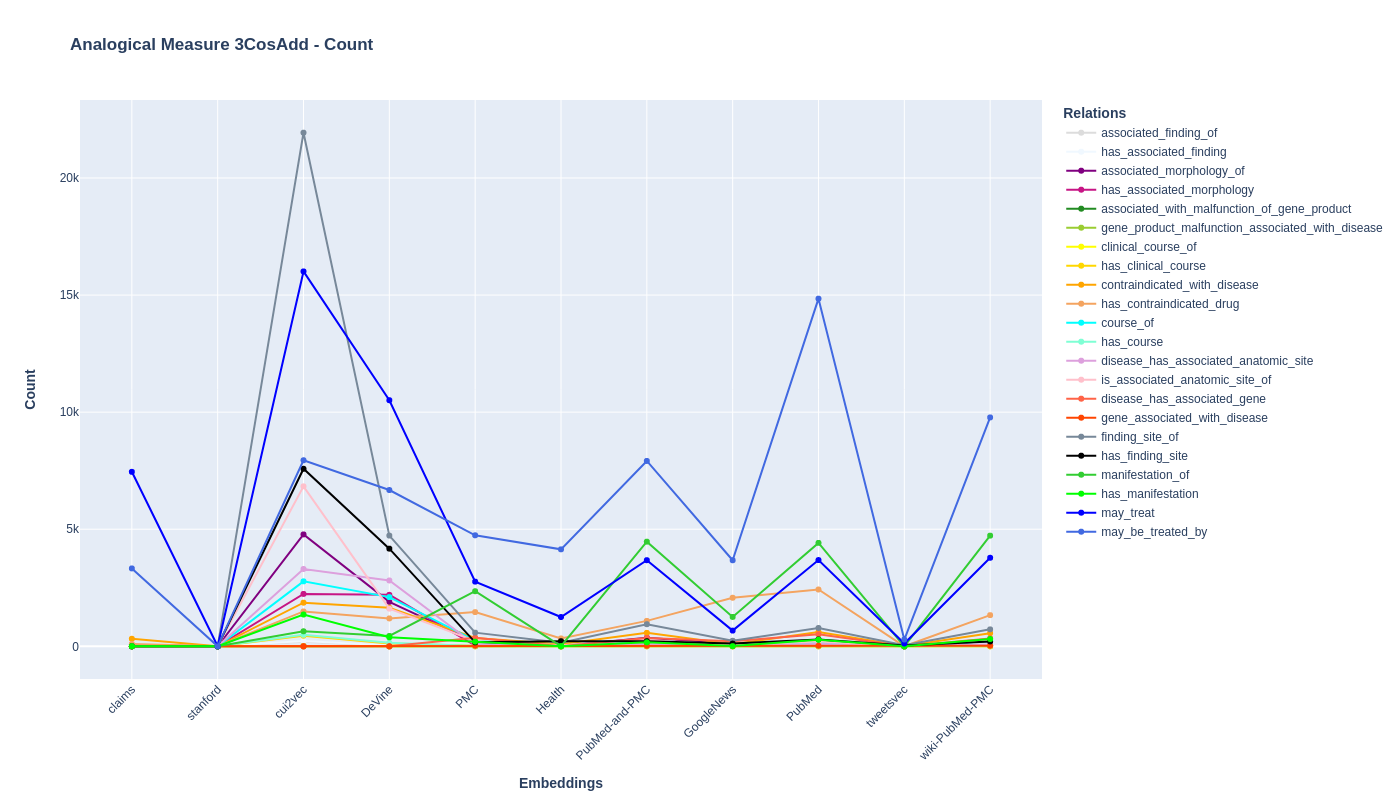

In [29]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in flattened_opposite:
    fig.add_trace(go.Scatter(name=r, x=em, y=[tmp[e]['add'][r]['count'] for e in embs], marker=dict(color = relas_colors[r])))#, mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='<b>Analogical Measure 3CosAdd - Count</b>'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = '<b>Relations</b>',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="<b>Count</b>"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="<b>Embeddings</b>"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

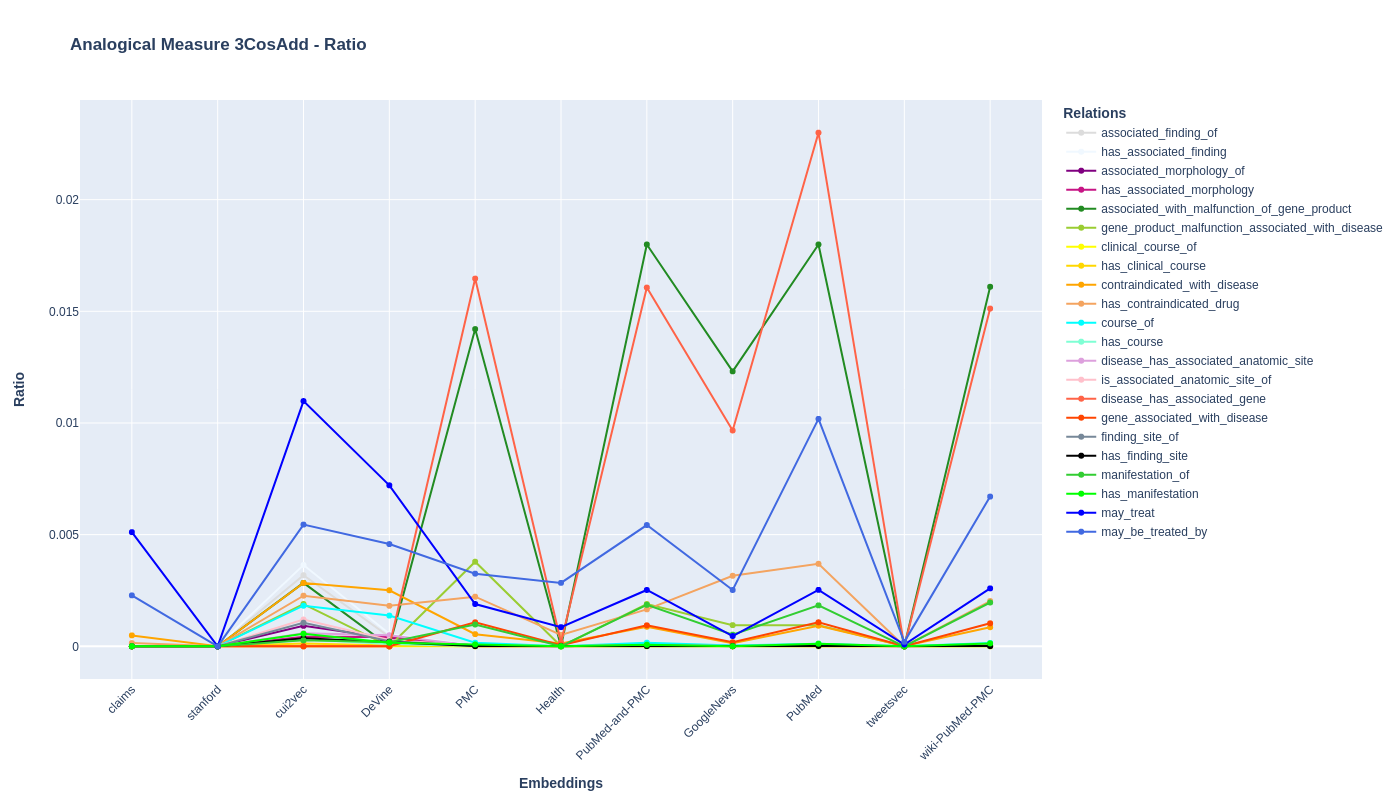

In [25]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in flattened_opposite:
    fig.add_trace(go.Scatter(name=r, x=em, y=[tmp[e]['add'][r]['ratio'] for e in embs], mode = 'lines+markers', marker=dict(color = relas_colors[r])))#, mode = 'lines+markers')) )) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='<b>Analogical Measure 3CosAdd - Ratio</b>'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = '<b>Relations</b>',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="<b>Ratio</b>"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="<b>Embeddings</b>"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

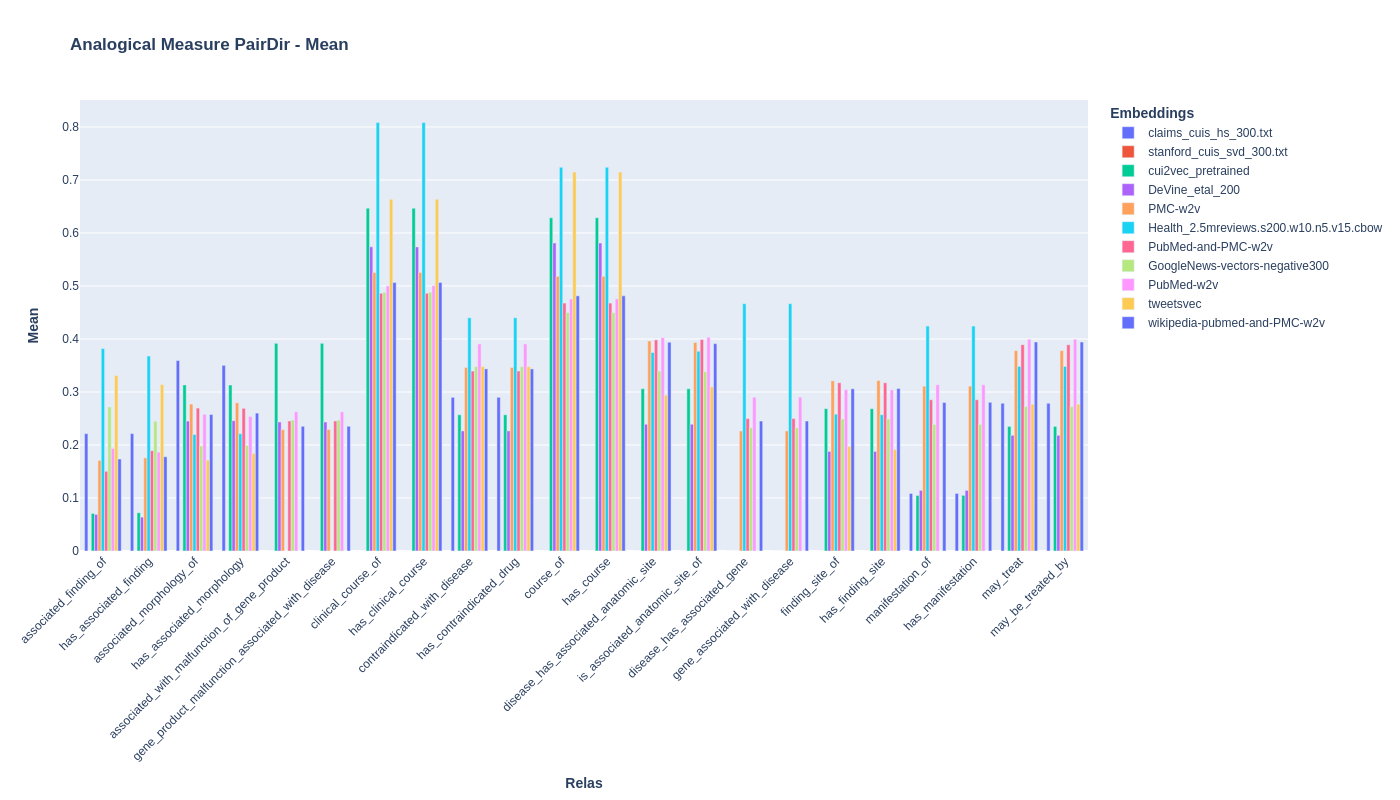

In [30]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Bar(name=e, x=flattened_opposite, y=[tmp[e]['pair'][r]['mean'] for r in flattened_opposite])) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='<b>Analogical Measure PairDir - Mean</b>'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = '<b>Embeddings</b>',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="<b>Mean</b>"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="<b>Relas</b>"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

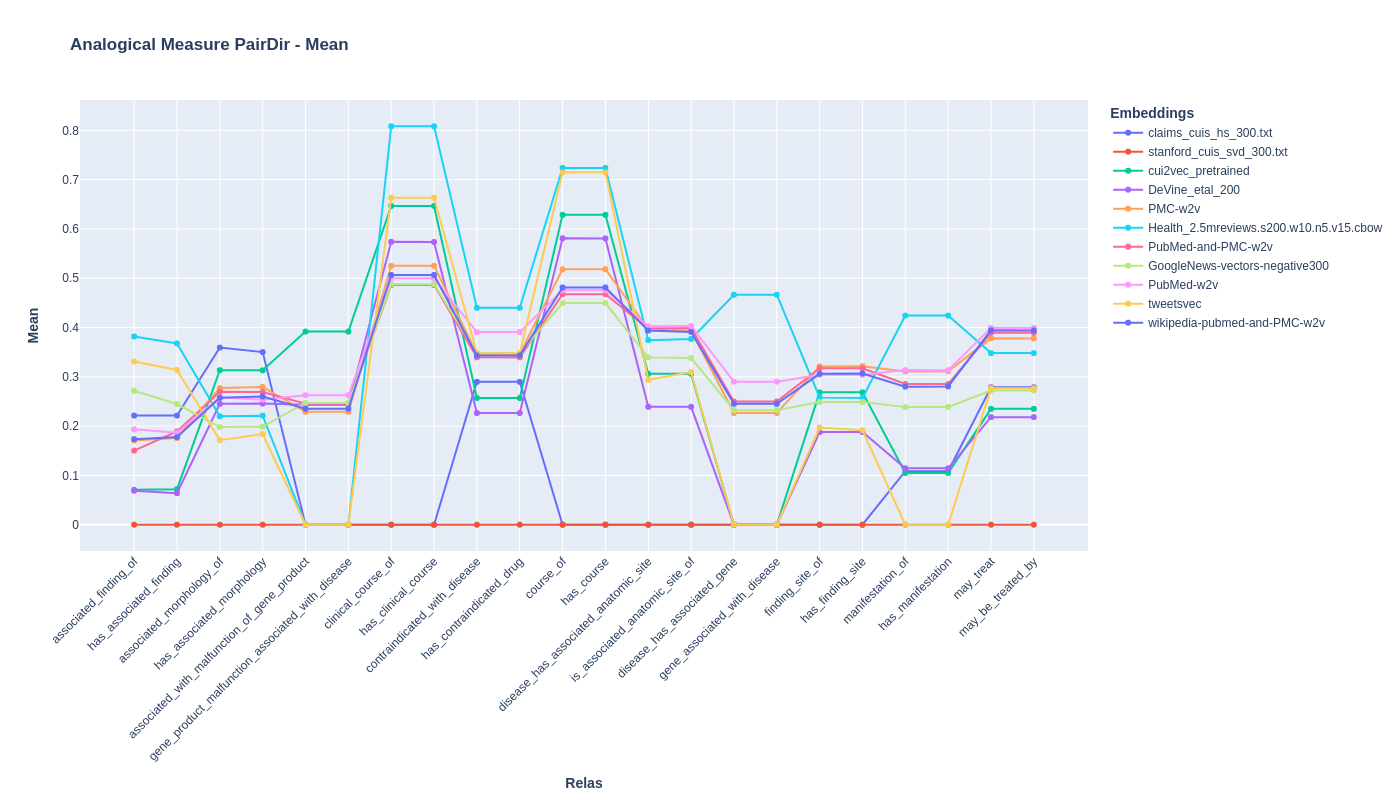

In [31]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Scatter(name=e, x=flattened_opposite, y=[tmp[e]['pair'][r]['mean'] for r in flattened_opposite], mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='<b>Analogical Measure PairDir - Mean</b>'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = '<b>Embeddings</b>',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="<b>Mean</b>"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="<b>Relas</b>"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

In [44]:
card_k = utils.inputs_load('Utilities/AnalogicalData/k_cardinality_per_rel') 

0:00:00


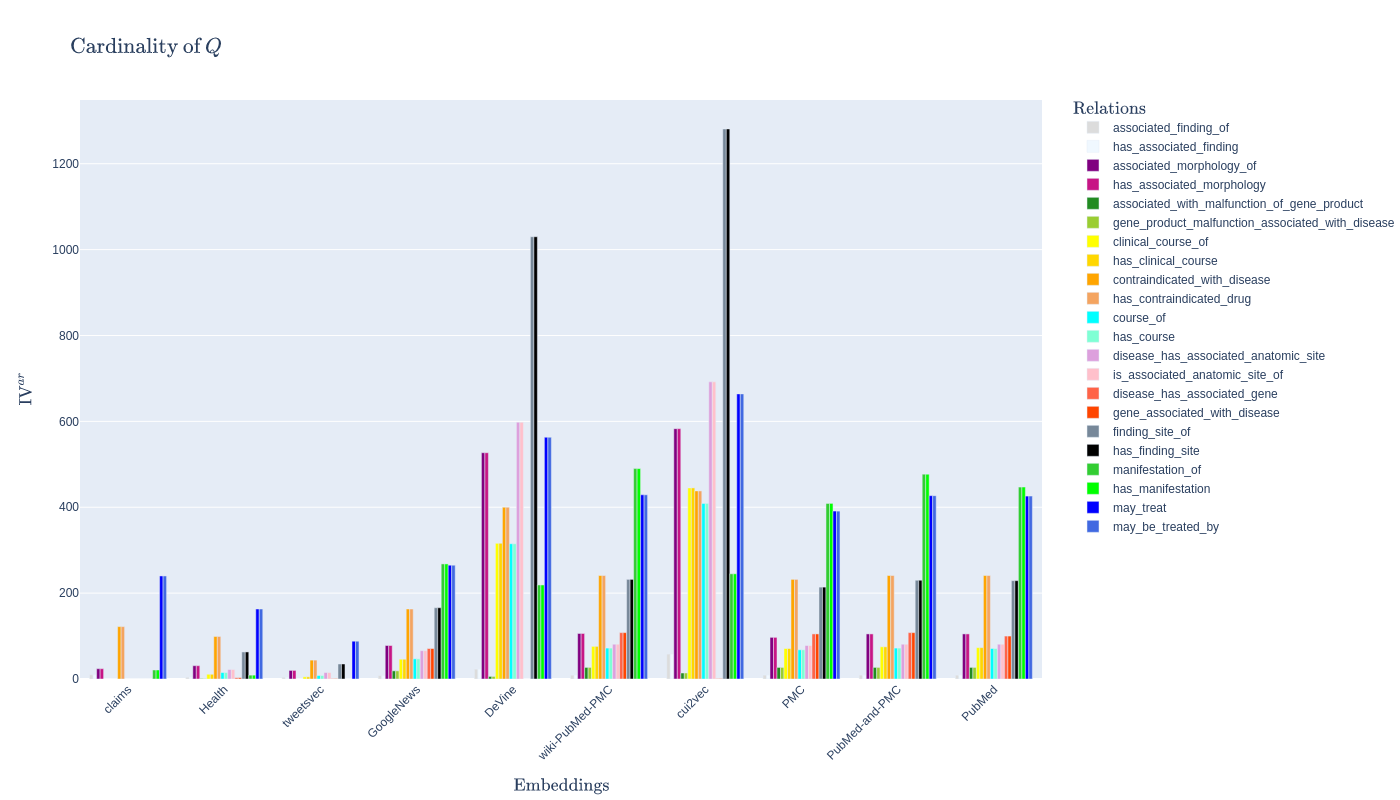

In [46]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in flattened_opposite:
    fig.add_trace(go.Bar(name=r, x=em, y=[card_k[r][e] for e in embs], marker=dict(color = relas_colors[r])))
    #fig.add_trace(go.Bar(name=r, x=em, y=[card_k[r][e] for e in embs], marker=dict(color = relas_colors[r])))


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text=r'$\large{\text{Cardinality of }Q}$'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = r'$\large{\text{Relations}}$',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text=r'$\large{\text{IV}^{ar}}$',
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text=r'$\large{\text{Embeddings}}$'#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

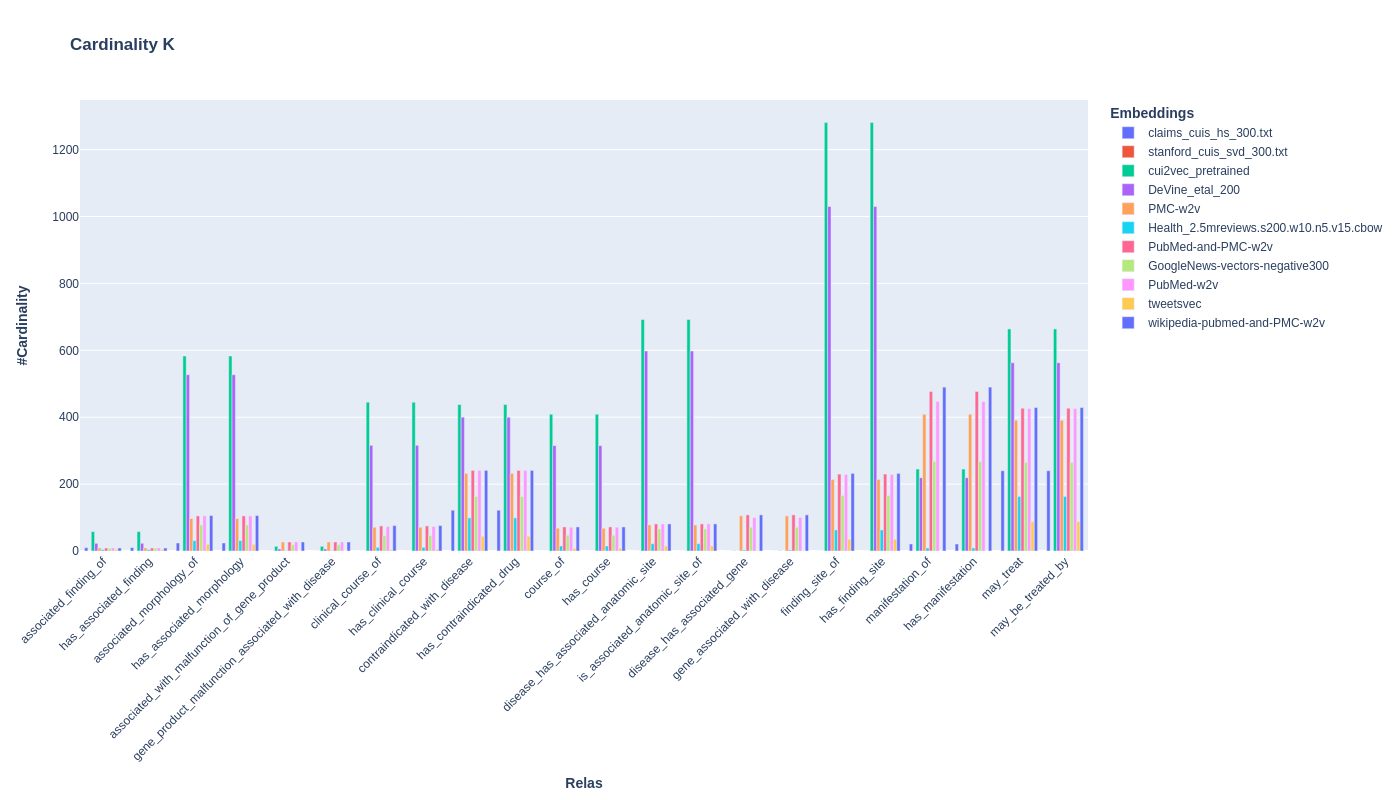

In [34]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Bar(name=e, x=flattened_opposite, y=[card_k[r][e] for r in flattened_opposite])) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='<b>Cardinality K</b>'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = '<b>Embeddings</b>',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="<b>#Cardinality</b>"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="<b>Relas</b>"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")